## Cluster Model

In [1]:
#1- load the pandas data frame songs of the audio features (minimum 500 songs as diverse as possible))
#2-  standardise the data using standardscaler
#3- save the scaler for future use for the new user input song. save it using pickle
#4- choosing the number of clusters k.
#5- fitting  k means cluster.
#6- build the elbow graph to find the best k.
#7- use the model with the best k to assign every observation in your data frame to its cluster number ( adding cluster columns to the pandas data frame) using model.predict
#8-save the model with the best k as your final model  using pickle.
#for the user input tasks and  the full scenario:
#1- get the song name from the user as an input
#2- play the input song in music embed player.
#3- get the audio features for that song from spotify API. using sp.audio_features(trackid) . pay attention to keep  only the audio features columns.
#4- load the stabdardscaler using pickle and use it to scale the new song.
#5- using mode.predict(new scaled audio record for the new song) to predict the cluster (label) for the new song.
#6- return random song from the same cluster   that the new song belongs to from your data frame and suggest it to the user.
#7-  play it using embedded music player. (edited)

In [2]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

In [3]:
tracks_df = pd.read_csv('spotify_tracks_df.csv')

In [4]:
tracks_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.620,0.681,-4.915,0.3560,0.0138,0.000000,0.0248,0.741,160.743,1eprzC29mwUQqcVj0eILdx,162493
1,0.807,0.376,-7.768,0.0638,0.3790,0.003870,0.1140,0.671,104.908,7cFPWLFiE60sdgzPsyydUJ,209291
2,0.838,0.525,-3.562,0.0665,0.3450,0.000002,0.0771,0.884,144.981,0QHEIqNKsMoOY5urbzN48u,134256
3,0.620,0.837,-4.356,0.1300,0.1280,0.000242,0.2420,0.433,172.081,5RobAV5ROH5KARimi7n3cO,170438
4,0.637,0.643,-6.571,0.0519,0.1300,0.000002,0.1420,0.533,97.008,0V3wPSX9ygBnCm8psDIegu,200690
...,...,...,...,...,...,...,...,...,...,...,...
148063,0.806,0.706,-6.044,0.0909,0.0280,0.000000,0.0700,0.608,112.985,1tJtx09XQnxaynZLOaTNfZ,312355
148064,0.511,0.821,-6.459,0.0706,0.1590,0.000000,0.1220,0.630,121.074,1ygacgsmdK4Y1WQcJuZQHb,215067
148065,0.719,0.547,-13.190,0.0362,0.0679,0.000003,0.2290,0.554,121.724,1ip1ULxxvAzaqH3VqKObdu,316000
148066,0.907,0.917,-5.464,0.0778,0.1200,0.047500,0.0390,0.906,108.210,76as3dkOkHGMAvwmaKXPMD,246240


### Scaling features

In [5]:
tracks_df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,148068.000000,148068.000000,148068.000000,148068.000000,148068.000000,148068.000000,148068.000000,148068.000000,148068.000000,1.480680e+05
mean,0.561559,0.534024,-11.038123,0.079738,0.403961,0.252825,0.171322,0.448567,117.706329,2.182165e+05
std,0.196178,0.290450,7.862723,0.083748,0.372254,0.379336,0.142393,0.270482,30.568905,8.518565e+04
min,0.000000,0.000020,-52.363000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+03
25%,0.441000,0.301000,-13.450000,0.036500,0.041700,0.000001,0.094900,0.213000,94.619000,1.707600e+05
50%,0.584000,0.578000,-8.336000,0.047300,0.278000,0.000922,0.114000,0.439000,116.998000,2.051070e+05
75%,0.707000,0.777000,-5.708000,0.079900,0.801000,0.650000,0.191000,0.668000,136.150750,2.458860e+05
max,0.987000,1.000000,1.634000,0.963000,0.996000,1.000000,0.995000,1.000000,236.059000,3.815787e+06


In [6]:
# drop column id
X = tracks_df.drop(['id'], axis = 1)

In [7]:
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.620,0.681,-4.915,0.3560,0.0138,0.000000,0.0248,0.741,160.743,162493
1,0.807,0.376,-7.768,0.0638,0.3790,0.003870,0.1140,0.671,104.908,209291
2,0.838,0.525,-3.562,0.0665,0.3450,0.000002,0.0771,0.884,144.981,134256
3,0.620,0.837,-4.356,0.1300,0.1280,0.000242,0.2420,0.433,172.081,170438
4,0.637,0.643,-6.571,0.0519,0.1300,0.000002,0.1420,0.533,97.008,200690
...,...,...,...,...,...,...,...,...,...,...
148063,0.806,0.706,-6.044,0.0909,0.0280,0.000000,0.0700,0.608,112.985,312355
148064,0.511,0.821,-6.459,0.0706,0.1590,0.000000,0.1220,0.630,121.074,215067
148065,0.719,0.547,-13.190,0.0362,0.0679,0.000003,0.2290,0.554,121.724,316000
148066,0.907,0.917,-5.464,0.0778,0.1200,0.047500,0.0390,0.906,108.210,246240


In [8]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.620,0.681,-4.915,0.3560,0.0138,0.000000,0.0248,0.741,160.743,162493
1,0.807,0.376,-7.768,0.0638,0.3790,0.003870,0.1140,0.671,104.908,209291
2,0.838,0.525,-3.562,0.0665,0.3450,0.000002,0.0771,0.884,144.981,134256
3,0.620,0.837,-4.356,0.1300,0.1280,0.000242,0.2420,0.433,172.081,170438
4,0.637,0.643,-6.571,0.0519,0.1300,0.000002,0.1420,0.533,97.008,200690


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.297900,0.506029,0.778756,3.298723,-1.048109,-0.666496,-1.029002,1.081159,1.407863,-0.654144
1,1.251119,-0.544068,0.415903,-0.190312,-0.067055,-0.656294,-0.402564,0.822361,-0.418673,-0.104777
2,1.409140,-0.031070,0.950834,-0.158073,-0.158391,-0.666491,-0.661707,1.609846,0.892239,-0.985621
3,0.297900,1.043127,0.849851,0.600154,-0.741328,-0.665858,0.496360,-0.057551,1.778764,-0.560877
4,0.384556,0.375197,0.568141,-0.332405,-0.735955,-0.666492,-0.205925,0.312160,-0.677106,-0.205745


In [9]:
scaler.scale_

array([1.96177272e-01, 2.90449456e-01, 7.86269667e+00, 8.37480808e-02,
       3.72252693e-01, 3.79334517e-01, 1.42392424e-01, 2.70481377e-01,
       3.05688022e+01, 8.51853616e+04])

In [10]:
X_scaled_df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,1.480680e+05,1.480680e+05,1.480680e+05,1.480680e+05,1.480680e+05,1.480680e+05,1.480680e+05,1.480680e+05,1.480680e+05,1.480680e+05
mean,-1.728505e-15,-2.593049e-15,-1.645591e-15,-1.929954e-15,-1.792721e-15,3.955270e-14,5.607596e-16,-3.893084e-16,-3.356766e-16,-8.415332e-16
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-2.862507e+00,-1.838544e+00,-5.255815e+00,-9.521208e-01,-1.085180e+00,-6.664964e-01,-1.203169e+00,-1.658401e+00,-3.850538e+00,-2.526449e+00
25%,-6.145401e-01,-8.022885e-01,-3.067494e-01,-5.162899e-01,-9.731597e-01,-6.664934e-01,-5.367008e-01,-8.709161e-01,-7.552579e-01,-5.570968e-01
50%,1.143924e-01,1.514058e-01,3.436636e-01,-3.873318e-01,-3.383758e-01,-6.640645e-01,-4.025645e-01,-3.536873e-02,-2.317163e-02,-1.538938e-01
75%,7.413764e-01,8.365508e-01,6.779001e-01,1.930888e-03,1.066584e+00,1.047031e+00,1.381946e-01,8.112700e-01,6.033740e-01,3.248152e-01
max,2.168657e+00,1.604326e+00,1.611676e+00,1.054665e+01,1.590422e+00,1.969699e+00,5.784562e+00,2.038711e+00,3.871682e+00,4.223226e+01


In [11]:
df =pd.merge(X_scaled_df,tracks_df['id'],left_index=True,right_index=True)

In [12]:
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,id
0,0.297900,0.506029,0.778756,3.298723,-1.048109,-0.666496,-1.029002,1.081159,1.407863,-0.654144,1eprzC29mwUQqcVj0eILdx
1,1.251119,-0.544068,0.415903,-0.190312,-0.067055,-0.656294,-0.402564,0.822361,-0.418673,-0.104777,7cFPWLFiE60sdgzPsyydUJ
2,1.409140,-0.031070,0.950834,-0.158073,-0.158391,-0.666491,-0.661707,1.609846,0.892239,-0.985621,0QHEIqNKsMoOY5urbzN48u
3,0.297900,1.043127,0.849851,0.600154,-0.741328,-0.665858,0.496360,-0.057551,1.778764,-0.560877,5RobAV5ROH5KARimi7n3cO
4,0.384556,0.375197,0.568141,-0.332405,-0.735955,-0.666492,-0.205925,0.312160,-0.677106,-0.205745,0V3wPSX9ygBnCm8psDIegu
...,...,...,...,...,...,...,...,...,...,...,...
148063,1.246022,0.592102,0.635167,0.133277,-1.009963,-0.666496,-0.711570,0.589443,-0.154449,1.105102,1tJtx09XQnxaynZLOaTNfZ
148064,-0.257720,0.988040,0.582386,-0.109116,-0.658051,-0.666496,-0.346382,0.670780,0.110167,-0.036972,1ygacgsmdK4Y1WQcJuZQHb
148065,0.802546,0.044675,-0.273682,-0.519872,-0.902777,-0.666489,0.405063,0.389799,0.131430,1.147891,1ip1ULxxvAzaqH3VqKObdu
148066,1.760862,1.318562,0.708933,-0.023144,-0.762819,-0.541277,-0.929278,1.691183,-0.310654,0.328971,76as3dkOkHGMAvwmaKXPMD


## Choose the number of clusters (K)

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 

Training a K-Means model with 21 clusters! 

Training a K-Means model with 22 clusters! 

Training a K-Means model with 23 clusters! 

Training a K-Means

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

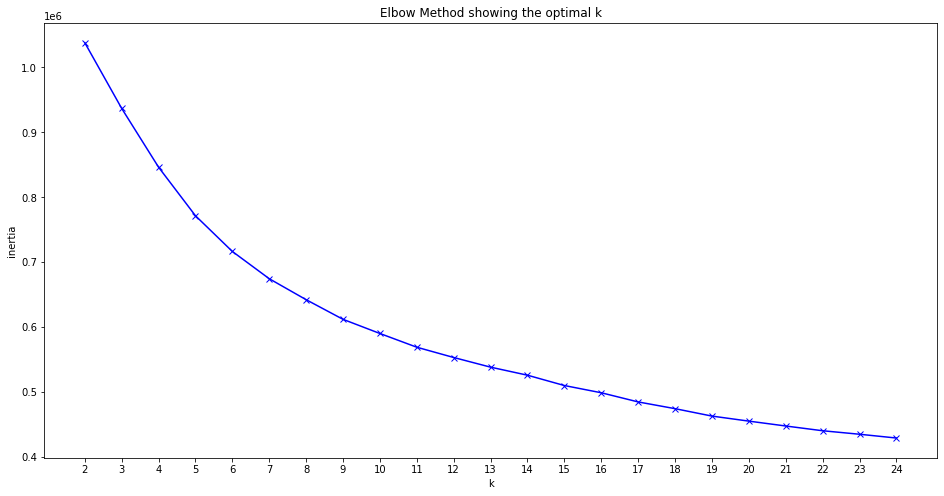

In [13]:
K = range(2, 25)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

#### Silhouette method

In [15]:
import pickle
K = range(5, 10)
silhouette = []

for k in K:
    print(f"Running for K = {k}")
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
#     kmeans.fit(X_scaled_df)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.fit_predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

Running for K = 5


KeyboardInterrupt: 

In [14]:
kmeans = KMeans(n_clusters=9, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=9, random_state=1234)

In [15]:
kmeans.cluster_centers_

array([[-6.25187495e-02, -1.08535926e+00, -7.71677992e-01,
        -2.63678078e-01,  1.18877349e+00,  1.61511279e+00,
        -3.24286912e-01, -5.48158164e-01, -1.30793606e-01,
        -4.11398214e-01],
       [ 1.10970337e-01,  6.25659418e-01,  5.51014885e-01,
        -2.45817084e-01, -8.19581489e-01, -3.06004680e-01,
        -4.06886573e-02, -3.70600355e-01, -2.37446717e-01,
         9.93357504e-02],
       [ 7.83402989e-01,  3.27618350e-01,  4.32057601e-01,
         2.84264959e+00, -4.10330245e-01, -5.60673681e-01,
        -7.99660003e-03,  4.14865862e-01,  1.69357491e-01,
        -2.87323104e-01],
       [ 8.52642571e-01,  5.83826673e-01,  5.27747526e-01,
        -1.72547517e-01, -5.49424836e-01, -4.92393219e-01,
        -1.57523103e-01,  1.12173645e+00, -1.23035078e-01,
        -1.11222378e-01],
       [-5.13410105e-01, -3.30121732e-01, -3.78564649e-01,
        -3.10981506e-01,  2.18155685e-01,  7.90399474e-01,
        -1.96803902e-01, -5.94077823e-01, -7.05316193e-02,
         3.

In [16]:
kmeans.feature_names_in_

array(['danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'], dtype=object)

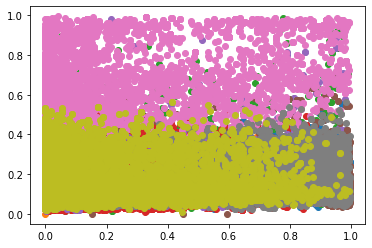

In [17]:
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 4], X.to_numpy()[row_ix, 6])
    # show the plot
pyplot.show()

In [18]:
clusters = kmeans.predict(X_scaled_df)
pd.Series(clusters).value_counts().sort_index()

0    13608
1    24571
2    11098
3    33967
4     4531
5    15620
6     6564
7    20873
8    17236
dtype: int64

In [19]:
df["cluster"] = clusters
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,id,cluster
0,0.297900,0.506029,0.778756,3.298723,-1.048109,-0.666496,-1.029002,1.081159,1.407863,-0.654144,1eprzC29mwUQqcVj0eILdx,2
1,1.251119,-0.544068,0.415903,-0.190312,-0.067055,-0.656294,-0.402564,0.822361,-0.418673,-0.104777,7cFPWLFiE60sdgzPsyydUJ,3
2,1.409140,-0.031070,0.950834,-0.158073,-0.158391,-0.666491,-0.661707,1.609846,0.892239,-0.985621,0QHEIqNKsMoOY5urbzN48u,3
3,0.297900,1.043127,0.849851,0.600154,-0.741328,-0.665858,0.496360,-0.057551,1.778764,-0.560877,5RobAV5ROH5KARimi7n3cO,8
4,0.384556,0.375197,0.568141,-0.332405,-0.735955,-0.666492,-0.205925,0.312160,-0.677106,-0.205745,0V3wPSX9ygBnCm8psDIegu,1
...,...,...,...,...,...,...,...,...,...,...,...,...
148063,1.246022,0.592102,0.635167,0.133277,-1.009963,-0.666496,-0.711570,0.589443,-0.154449,1.105102,1tJtx09XQnxaynZLOaTNfZ,3
148064,-0.257720,0.988040,0.582386,-0.109116,-0.658051,-0.666496,-0.346382,0.670780,0.110167,-0.036972,1ygacgsmdK4Y1WQcJuZQHb,3
148065,0.802546,0.044675,-0.273682,-0.519872,-0.902777,-0.666489,0.405063,0.389799,0.131430,1.147891,1ip1ULxxvAzaqH3VqKObdu,3
148066,1.760862,1.318562,0.708933,-0.023144,-0.762819,-0.541277,-0.929278,1.691183,-0.310654,0.328971,76as3dkOkHGMAvwmaKXPMD,3


In [20]:
df[df.id == '0jdny0dhgjUwoIp5GkqEaA']

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,id,cluster


### Saving the scaler and the model

In [21]:
with open("Model/scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open("Model/kmeans_4.pickle", "wb") as f:
    pickle.dump(kmeans,f)

# --------------

In [26]:
import config

In [27]:
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))


### User Input

In [24]:
user_input["tracks"]["items"][0]["external_urls"]["spotify"]

NameError: name 'user_input' is not defined

In [158]:
def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )
# play_song('0jdny0dhgjUwoIp5GkqEaA')

In [162]:
user_song_features_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.179,0.0502,-24.738,0.0375,0.987,0.941,0.0847,0.0353,79.941,204507


In [28]:
def load(filename = "scaler.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!")

In [29]:
scaler2 = load("Model/scaler.pickle")

In [30]:
scaler2.scale_

array([1.96177272e-01, 2.90449456e-01, 7.86269667e+00, 8.37480808e-02,
       3.72252693e-01, 3.79334517e-01, 1.42392424e-01, 2.70481377e-01,
       3.05688022e+01, 8.51853616e+04])

In [31]:
def load(filename = "kmeans_4.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!")

In [32]:
model2 = load("Model/kmeans_4.pickle")

In [33]:
model2.cluster_centers_

array([[-6.25187495e-02, -1.08535926e+00, -7.71677992e-01,
        -2.63678078e-01,  1.18877349e+00,  1.61511279e+00,
        -3.24286912e-01, -5.48158164e-01, -1.30793606e-01,
        -4.11398214e-01],
       [ 1.10970337e-01,  6.25659418e-01,  5.51014885e-01,
        -2.45817084e-01, -8.19581489e-01, -3.06004680e-01,
        -4.06886573e-02, -3.70600355e-01, -2.37446717e-01,
         9.93357504e-02],
       [ 7.83402989e-01,  3.27618350e-01,  4.32057601e-01,
         2.84264959e+00, -4.10330245e-01, -5.60673681e-01,
        -7.99660003e-03,  4.14865862e-01,  1.69357491e-01,
        -2.87323104e-01],
       [ 8.52642571e-01,  5.83826673e-01,  5.27747526e-01,
        -1.72547517e-01, -5.49424836e-01, -4.92393219e-01,
        -1.57523103e-01,  1.12173645e+00, -1.23035078e-01,
        -1.11222378e-01],
       [-5.13410105e-01, -3.30121732e-01, -3.78564649e-01,
        -3.10981506e-01,  2.18155685e-01,  7.90399474e-01,
        -1.96803902e-01, -5.94077823e-01, -7.05316193e-02,
         3.

In [34]:
predicted_cluster

NameError: name 'predicted_cluster' is not defined

In [176]:
type(new_cluster_ids)

pandas.core.series.Series

In [210]:
user_input = sp.search(q=input(" Search "),limit=3,market="GB")
user_input

 Search still dre


{'tracks': {'href': 'https://api.spotify.com/v1/search?query=still+dre&type=track&market=GB&offset=0&limit=3',
  'items': [{'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6DPYiyq5kWVQS4RGwxzPC7'},
       'href': 'https://api.spotify.com/v1/artists/6DPYiyq5kWVQS4RGwxzPC7',
       'id': '6DPYiyq5kWVQS4RGwxzPC7',
       'name': 'Dr. Dre',
       'type': 'artist',
       'uri': 'spotify:artist:6DPYiyq5kWVQS4RGwxzPC7'}],
     'external_urls': {'spotify': 'https://open.spotify.com/album/7q2B4M5EiBkqrlsNW8lB7N'},
     'href': 'https://api.spotify.com/v1/albums/7q2B4M5EiBkqrlsNW8lB7N',
     'id': '7q2B4M5EiBkqrlsNW8lB7N',
     'images': [{'height': 640,
       'url': 'https://i.scdn.co/image/ab67616d0000b2739b19c107109de740bad72df5',
       'width': 640},
      {'height': 300,
       'url': 'https://i.scdn.co/image/ab67616d00001e029b19c107109de740bad72df5',
       'width': 300},
      {'height': 64,
       'url': 'https://i.scdn

In [211]:
track_id=track_id=user_input["tracks"]["items"][0]["id"]
track_id

'503OTo2dSqe7qk76rgsbep'

In [212]:
from IPython.display import IFrame

track_id
IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [213]:
user_song_audio_features = sp.audio_features(track_id)

In [214]:
user_song_audio_features

[{'danceability': 0.816,
  'energy': 0.775,
  'key': 11,
  'loudness': -3.323,
  'mode': 1,
  'speechiness': 0.234,
  'acousticness': 0.16,
  'instrumentalness': 0.00031,
  'liveness': 0.0543,
  'valence': 0.527,
  'tempo': 93.431,
  'type': 'audio_features',
  'id': '503OTo2dSqe7qk76rgsbep',
  'uri': 'spotify:track:503OTo2dSqe7qk76rgsbep',
  'track_href': 'https://api.spotify.com/v1/tracks/503OTo2dSqe7qk76rgsbep',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/503OTo2dSqe7qk76rgsbep',
  'duration_ms': 270587,
  'time_signature': 4}]

In [215]:
user_song_features_df = pd.DataFrame(user_song_audio_features, columns=["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","duration_ms"])

In [216]:
scaled_user_features = scaler2.transform(user_song_features_df)

In [217]:
scaled_user_features

array([[ 1.2969963 ,  0.82966495,  0.98123114,  1.84197305, -0.65536477,
        -0.6656792 , -0.82182834,  0.28997714, -0.79412104,  0.6147829 ]])

In [218]:
predicted_cluster = model2.predict(scaled_user_features)

/Users/smritikhilrani/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [219]:
predicted_cluster

array([2], dtype=int32)

In [233]:
import random

In [234]:
new_cluster_ids = df.loc[df.cluster == predicted_cluster[0], 'id']

In [235]:
rec_track_id = new_cluster_ids.sample(n=1).iloc[0]
rec_track_id

'2xLMifQCjDGFmkHkpNLD9h'

In [236]:
from IPython.display import IFrame

rec_track_id
IFrame(src="https://open.spotify.com/embed/track/"+rec_track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )